In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import tensorflow as tf
import os
import glob
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import cv2
from keras.preprocessing.image import ImageDataGenerator
from random import randint
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
def preprocess(X):
    rgb2gray = [0.299, 0.587, 0.114]
    # Convert images to grayscale
    X_gray = np.dot(X[...,:3], rgb2gray)

    # Normalize images
    X_gray = (X_gray/255-0.5)*2
    X_gray = X_gray.reshape(*X_gray.shape, 1)
    return X_gray

In [3]:
train_dir = "Bottle-Classifier/training_data_2nd/"
data = pd.read_csv(train_dir + "label.csv")
image_size = (96,96)

X_data = []
Y_data = []
for i in range(len(data)):
    filename = data.iloc[i,0]
    label = data.iloc[i,2]
    img = plt.imread(train_dir + filename)
    img = cv2.resize(img, image_size, interpolation=cv2.INTER_CUBIC)
    X_data.append(img)
    Y_data.append(label)

X_data = np.array(X_data)
Y_data = np.array(Y_data)

X_data, Y_data = shuffle(X_data, Y_data)
split = int(round(len(data)*0.8))
train = np.arange(split)
valid = np.arange(split, len(data))
X_train, Y_train = X_data[train], Y_data[train]
X_valid, Y_valid = X_data[valid], Y_data[valid]

n_classes = len(np.unique(Y_data))
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)

In [4]:
print(X_valid.shape)

(169, 96, 96, 1)


In [5]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run('accuracy_operation:0', feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/num_examples,logits

In [6]:
BATCH_SIZE = 256

In [7]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('Bottle.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    y = graph.get_tensor_by_name("y:0")
    num_examples = len(X_valid)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_valid[offset:offset+BATCH_SIZE], Y_valid[offset:offset+BATCH_SIZE]
        accuracy = sess.run('accuracy_operation:0', feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy*len(batch_x))
    print(total_accuracy/num_examples)

INFO:tensorflow:Restoring parameters from .\Bottle
0.5917159914970398


In [11]:
def classifier(dataset,n):
    with tf.Session() as sess:
        new_saver.restore(sess, tf.train.latest_checkpoint('.'))
#         output = sess.run(tf.nn.top_k('logits:0', k=2), feed_dict={x: dataset})
        output = sess.run('logits:0', feed_dict={x:dataset})
        bottleId = []
        print(output)

def randomImages():
    dataset = []
    rgb2gray = [0.299, 0.587, 0.114]
    %matplotlib inline
    fig = plt.figure(figsize=(20,5))
    n = 2
    for i in range(1,n):
        img = X_data[randint(0,len(X_data)),:,:,:]
        fig.add_subplot(1,n-1,i)
        plt.imshow(img)
        dataset.append(img)
    plt.show()
    dataset = np.array(dataset,dtype=np.float32)
    dataset = np.dot(dataset[...,:3], rgb2gray)
    dataset = (dataset/255-0.5)*2
    dataset = dataset.reshape(*dataset.shape, 1)
    return dataset,n

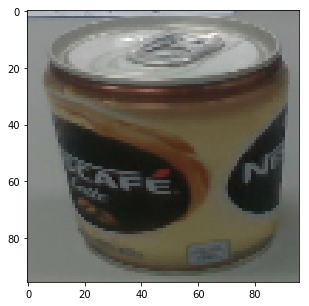

In [9]:
dataset, n = randomImages()

In [12]:
classifier(dataset,n)

INFO:tensorflow:Restoring parameters from .\Bottle
[[ 0.9107553   0.79109097 -0.2668724  -0.29838103]]
